In [1]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached grpcio-1.62.1-cp310-cp310-macosx_12_0_universal2.whl.metadata (4.0 kB)
  Using c

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
#nomralization
import numpy as np

In [6]:
np.max(X_train),np.min(X_train)

(255, 0)

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [8]:
np.max(X_train),np.min(X_train)

(1.0, 0.0)

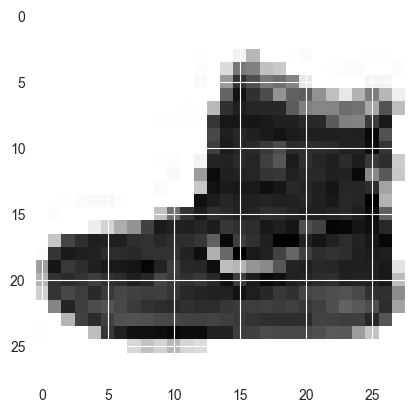

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

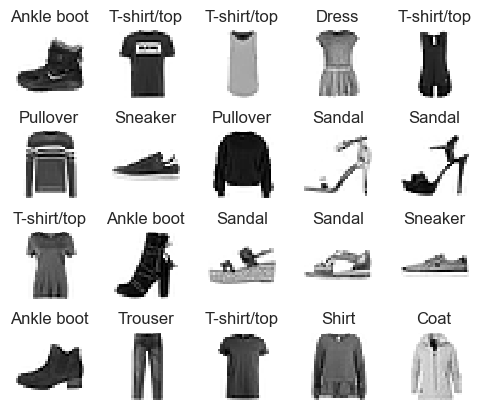

In [11]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

model = Sequential()
model.add(InputLayer(input_shape=[28,28]))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/Users/welcome/anaconda3/envs/saiiwinner_gen_ai/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.6672 - loss: 1.0786 - val_accuracy: 0.8062 - val_loss: 0.5579
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.8187 - loss: 0.5226 - val_accuracy: 0.8344 - val_loss: 0.4574
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.8383 - loss: 0.4630 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.8505 - loss: 0.4292 - val_accuracy: 0.8492 - val_loss: 0.4344
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8584 - loss: 0.4089 - val_accuracy: 0.8490 - val_loss: 0.4095
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.8610 - loss: 0.3908 - val_accuracy: 0.8644 - val_loss: 0.3817
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.8686 - loss: 0.3737 - val_accuracy: 0.8640 - val_loss: 0.3714
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8709 -

In [15]:
model.save('/Users/welcome/Library/Mobile Documents/com~apple~CloudDocs/Data/ml_model/my_model.keras')

In [16]:
%md
# Load model

UsageError: Line magic function `%md` not found.


In [17]:
new_model = tf.keras.models.load_model('/Users/welcome/Library/Mobile Documents/com~apple~CloudDocs/Data/ml_model/my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,837 (339.21 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)